In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

In [2]:
X = 6 * np.random.rand(200,1)-3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)

# equation is y = 0.8x^2 + 0.9x +2

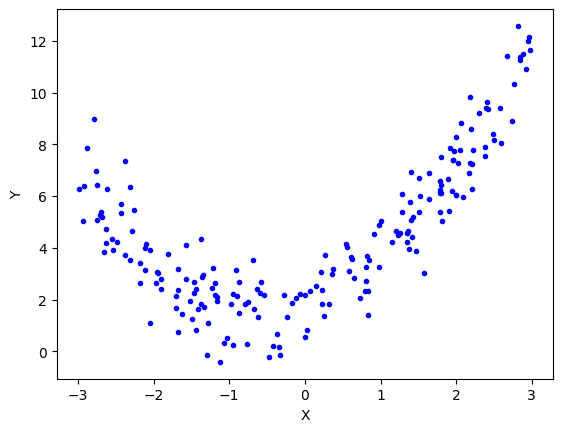

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [8]:
# Applying linear regression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.30894844214736583

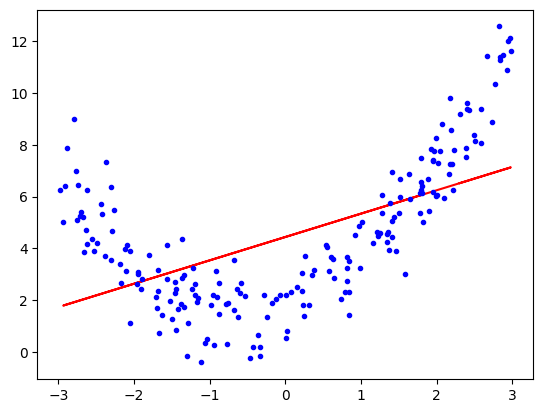

In [10]:
plt.plot(X_train, lr.predict(X_train), color="r")
plt.plot(X,y, "b.");

In [11]:
# Applying polynomial regression with degree 2, when using degree 2 you will generate 3 features for each input column

poly_lr = PolynomialFeatures(degree=2)

X_train_trans = poly_lr.fit_transform(X_train)
X_test_trans = poly_lr.transform(X_test)

In [12]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

y_pred = lr.predict(X_test_trans)

print(r2_score(y_test, y_pred))

0.9131245703053626


In [14]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly_lr.transform(X_new)
y_new = lr.predict(X_new_poly)

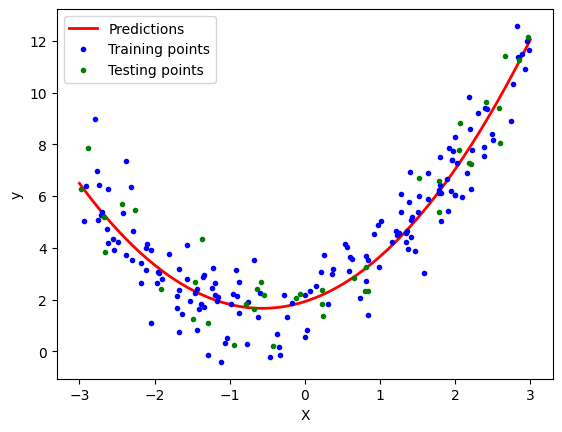

In [15]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

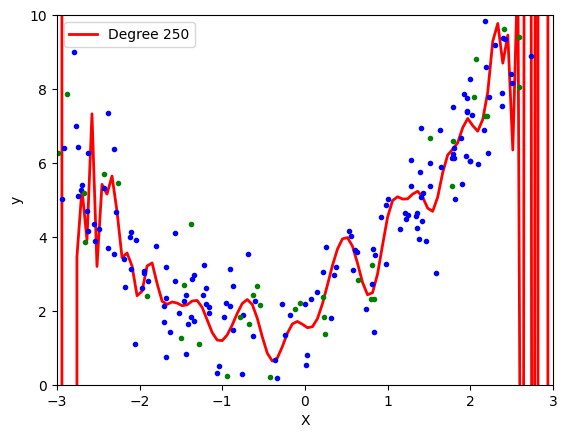

In [18]:
# what happens when the degree is higher than normal

def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly_lr.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show();

polynomial_regression(250)

c:\Users\qaise\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


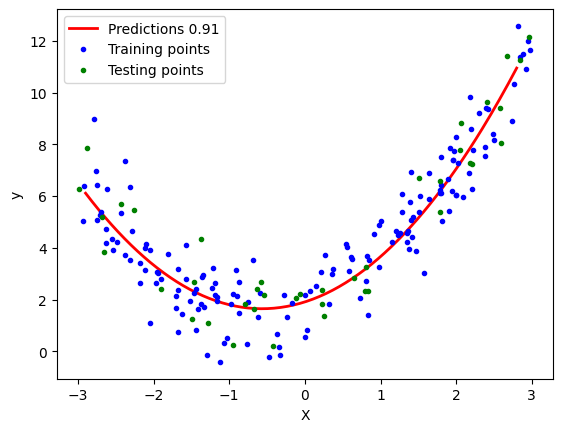

In [20]:
# Applying Gradient Descent on polynomial regression

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()